In [204]:
import pandas as pd
import numpy as np

In [205]:
dataFrame = pd.read_csv("verilerist4_wdummies.csv")

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
y = dataFrame["Fiyatlar"].values

x = dataFrame.drop(["Fiyatlar"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0, shuffle=True)

In [208]:
x_train.shape

(9006, 722)

In [209]:
y_train.shape

(9006,)

In [210]:
from sklearn.preprocessing import MinMaxScaler
#Modellemeler ölçeklemelere duyarlıdır. Daha hızlı ve hassas modelleme için verilerin normalleştirilmesini
#min max scaler ile yapacağız. Verilerimizi 0 ile 1 arasında ölçeklendirecek.

In [211]:
scaler = MinMaxScaler()

In [212]:
scaler.fit(x_train)

MinMaxScaler()

In [213]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [214]:
x_train
#Verimizin 0 ile 1 arasında ölçeklenmiş hali..

array([[0.07964602, 0.72222222, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08141593, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04424779, 0.46296296, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.13274336, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46902655, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10619469, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [215]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from keras.optimizers import RMSprop
#Keras eskiden ayrı bir kütüphaneyken artık tensorflow altında kullanıma açık. Gerekli olanları import ediyoruz.


In [292]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [293]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=32,epochs=40)

Epoch 1/40
282/282 [==============================] - 3s 5ms/step - loss: 2004184832.0000 - val_loss: 1139649280.0000
Epoch 2/40
282/282 [==============================] - 2s 7ms/step - loss: 943679296.0000 - val_loss: 711023104.0000
Epoch 3/40
282/282 [==============================] - 1s 4ms/step - loss: 613207936.0000 - val_loss: 508173472.0000
Epoch 4/40
282/282 [==============================] - 1s 4ms/step - loss: 492586848.0000 - val_loss: 430692608.0000
Epoch 5/40
282/282 [==============================] - 1s 3ms/step - loss: 434984736.0000 - val_loss: 390642688.0000
Epoch 6/40
282/282 [==============================] - 1s 3ms/step - loss: 399644352.0000 - val_loss: 368438048.0000
Epoch 7/40
282/282 [==============================] - 1s 3ms/step - loss: 375657376.0000 - val_loss: 346209184.0000
Epoch 8/40
282/282 [==============================] - 1s 3ms/step - loss: 358436224.0000 - val_loss: 333200480.0000
Epoch 9/40
282/282 [==============================] - 1s 4ms/step - lo

In [294]:
kayipVerisi = pd.DataFrame(model.history.history)

<Axes: >

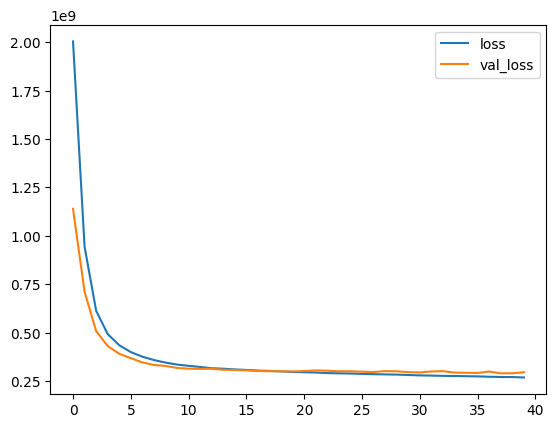

In [295]:
kayipVerisi.plot()
#Yaşanılan kayıpları görselleştiriyoruz. Loss düşerken validatin_loss sabit kalması veya yükselmesi
#istediğimiz bir gösterge değil. Modelin over fit olabileceğine işaret ediyor. Bu verilere göre parametre
#ayarı yapılması gerekebilir.

In [296]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [297]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [298]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [299]:
trainLoss

260302496.0

In [300]:
testLoss

295486816.0

In [301]:
testTahminleri = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [302]:
testTahminleri

array([[13308.387],
       [41721.496],
       [25289.775],
       ...,
       [17179.139],
       [12952.994],
       [27728.41 ]], dtype=float32)

In [303]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [304]:
tahminDf

,Gerçek Y
0,17000
1,37500
2,24000
3,10500
4,13500
...,...
2247,13000
2248,45000
2249,17000
2250,15000


In [305]:
testTahminleri = pd.Series(testTahminleri.reshape(2252,))

In [306]:
testTahminleri

0       13308.386719
1       41721.496094
2       25289.775391
3       15789.380859
4       16428.583984
            ...     
2247    16980.261719
2248    99706.523438
2249    17179.138672
2250    12952.994141
2251    27728.410156
Length: 2252, dtype: float32

In [307]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [308]:

tahminDf

,Gerçek Y,0
0,17000,13308.386719
1,37500,41721.496094
2,24000,25289.775391
3,10500,15789.380859
4,13500,16428.583984
...,...,...
2247,13000,16980.261719
2248,45000,99706.523438
2249,17000,17179.138672
2250,15000,12952.994141


In [309]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]

In [310]:
tahminDf.head(50)

,Gerçek Y,Tahmin Y
0,17000,13308.386719
1,37500,41721.496094
2,24000,25289.775391
3,10500,15789.380859
4,13500,16428.583984
5,25000,29183.275391
6,14000,12122.828125
7,7000,10464.783203
8,14500,16241.142578
9,105000,53092.207031


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

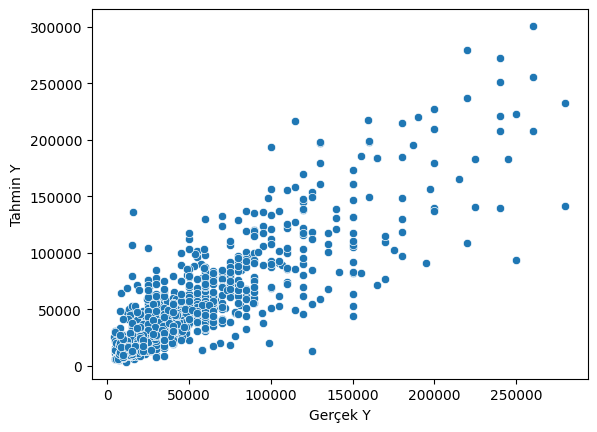

In [311]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)
#Tahmin ve test geraçek verimizi görselleştiriyoruz. Verinin dağılımı birbirine ne kadar yakınsa
#modelimiz o kadar başarılı olmuş diyebiliriz.

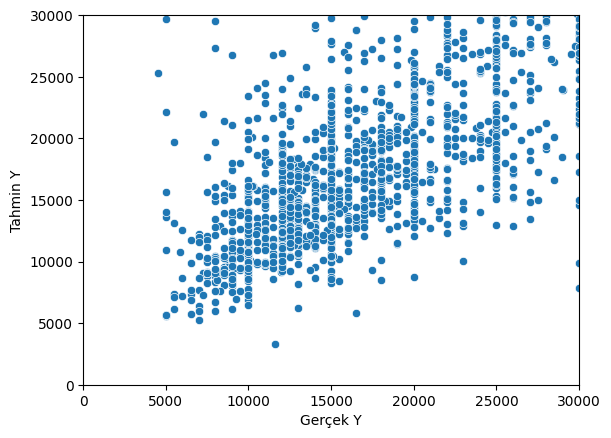

In [312]:
sbn.scatterplot(x="Gerçek Y", y="Tahmin Y", data=tahminDf)

plt.xlim(0, 30000)
plt.ylim(0, 30000)

plt.show()

#Daha yakından gözlemlemek anlamamız için daha net olacaktır.


In [313]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Modelin performansını değerlendirmek için ortalama hata değerlerine bakacağız. Bu metrikler bizim görselleştirme
#ile anlamaya çalıştığımız model performansının sayısala dökülmüş hali.

In [314]:
mean_absolute_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

9174.859052803758

In [315]:
mean_squared_error(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

295486822.5644223

In [316]:
from sklearn.metrics import r2_score
r2_skoru = r2_score(tahminDf["Gerçek Y"],tahminDf["Tahmin Y"])

print("R2 Skoru:", r2_skoru)

R2 Skoru: 0.7747033478375016


In [ ]:
#R2 skoru 1 e ne kadar yakınsa başarı oranımız o kadar yüksek demektir. Ancak bilinmelidirki çalıştığınız veriye
#ve hedefinize göre bu sonuçların değerlendirilmesi değişecektir. R2 skorunun düşük olması modelin başarısız olduğunu söylemek için yeterli değildir.
#Biz kira fiyatı gibi geniş bir skalada sonuçları olabilen bir veri ile çalıştık. Bu açıdan elde ettiğimiz R2 skoru
#büyük ölçüde başarılı oldu.